In [27]:
import pandas as pd
import matplotlib.pyplot as plt

from datetime import date
import numpy as np

           day  counts.palestine  counts.iran  counts.eurobasket  \
0   2022-09-01               418         3678                 62   
1   2022-09-02               437         3487                 77   
2   2022-09-03               608         2625                 60   
3   2022-09-04               658         3175                 84   
4   2022-09-05               637         3964                 76   
5   2022-09-06               525         3389                102   
6   2022-09-07               448         3822                115   
7   2022-09-08               633         3384                 91   
8   2022-09-09               545         3207                126   
9   2022-09-10               491         3302                 96   
10  2022-09-11               524         3358                102   
11  2022-09-12               487         3021                 43   
12  2022-09-13               595         3781                107   
13  2022-09-14               503         3528   

2022-09-30
['Oil sanction\n Russia', 'Liz Truss appointed', 'Queen died', 'R.Kelly found guilty', 'Protests start \nin Iran', 'GTA leak', 'Funeral Queen', 'mobilization russia', 'Nord stream \nsabotage', 'start Hurricane Ian']


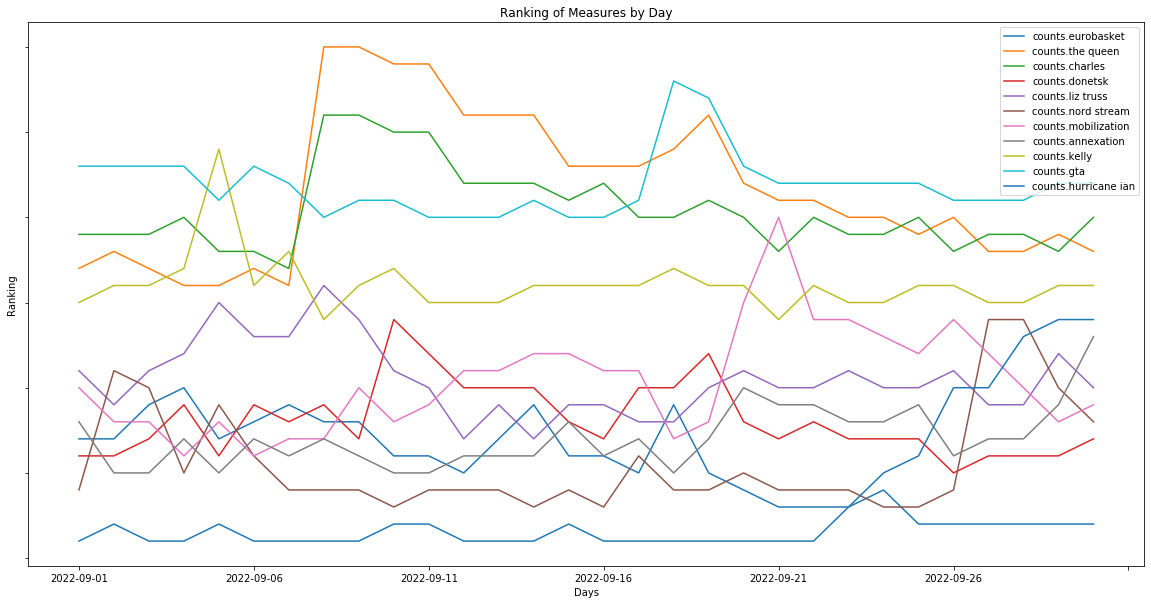

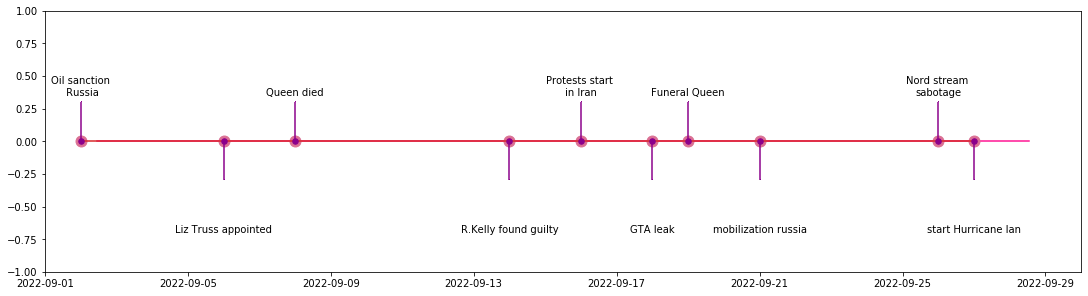

In [71]:
# Calculate the ranking for each day
disregard_cols = []
#ranked_df = df.rank(axis=1, method='max', ascending=False)
#for col in ranked_df.columns:
#    if ranked_df[col].max() >= 25:
#        disregard_cols.append(col)
#df_selected = df.drop(columns=disregard_cols)
df = pd.read_csv("analysis_new_final.csv")
print(df)
df = df.set_index('day')
ranked_df = df.rank(axis=1, method='max', ascending=True)
#print(ranked_df)
# Only include the top 15 values
diff_df_rank = ranked_df.max() - ranked_df.min()
#print(diff_df_rank)
filtered_diff_df_ranked = diff_df_rank.loc[diff_df_rank > 7]
print(filtered_diff_df_ranked)
df_mostdiff_rank = ranked_df[filtered_diff_df_ranked.index]

print(df_mostdiff_rank)
#print(filtered_diff_df)

#ranked_df = ranked_df.reindex(index=ranked_df.index[::-1])
# Plot the rankings


ax = df_mostdiff_rank.plot(kind='line', figsize=(20,10))
ax.set_yticklabels([])
plt.xlabel('Days')
plt.ylabel('Ranking')
plt.title('Ranking of Measures by Day')
plt.savefig('Ranking.jpg')
#plt.annotate("Liz Truss appointed", (5, 30), xytext=None, arrowprops=None, annotation_clip=None)
#plt.show()

#plt.savefig('ranking_plot-final.jpg')
#plt.subplot(2, 1, 2)
dates = [date(2022, 9, 2),date(2022, 9, 6), date(2022, 9, 8),date(2022, 9, 14), date(2022, 9, 16), date(2022, 9, 18), date(2022, 9, 19), date(2022, 9, 21), date(2022, 9, 26), date(2022, 9, 27)]
min_date = date(2022, 9, 1)
max_date = date(2022, 9, 30)
print(max_date)
labels = ['Oil sanction\n Russia','Liz Truss appointed', 'Queen died', 'R.Kelly found guilty','Protests start \nin Iran', 'GTA leak',
          'Funeral Queen', 'mobilization russia', 'Nord stream \nsabotage', 'start Hurricane Ian']
# labels with associated dates
#labels = ['{0:%d %b %Y}:\n{1}'.format(d, l) for l, d in zip (labels, dates)]
print(labels)
fig, ax = plt.subplots(figsize=(15, 4), constrained_layout=True)
_ = ax.set_ylim(-1, 1)
_ = ax.set_xlim(min_date, max_date)
_ = ax.axhline(0, xmin=0.05, xmax=0.95, c='deeppink', zorder=1)
 
_ = ax.scatter(dates, np.zeros(len(dates)), s=120, c='palevioletred', zorder=2)
_ = ax.scatter(dates, np.zeros(len(dates)), s=30, c='darkmagenta', zorder=3)

label_offsets = np.zeros(len(dates))
label_offsets[::2] = 0.35
label_offsets[1::2] = -0.7
for i, (l, d) in enumerate(zip(labels, dates)):
    _ = ax.text(d, label_offsets[i], l, ha='center',fontsize=10)
    
stems = np.zeros(len(dates))
stems[::2] = 0.3
stems[1::2] = -0.3   
markerline, stemline, baseline = ax.stem(dates, stems, use_line_collection=True)
_ = plt.setp(markerline, marker=',', color='darkmagenta')
_ = plt.setp(stemline, color='darkmagenta')

#plt.tight_layout()

# show the plot
plt.savefig('timeline.jpg')

counts.palestine               474.0
counts.iran                  10039.0
counts.eurobasket              118.0
counts.the queen             38918.0
counts.ukraine                9137.0
counts.luhansk                 229.0
counts.charles               11843.0
counts.putin                 11469.0
counts.afghanistan             748.0
counts.donetsk                 785.0
counts.elon musk               401.0
counts.russia                29320.0
counts.liz truss              1553.0
counts.nord stream             906.0
counts.sweden                  981.0
counts.mobilization           2530.0
counts.florence pugh           152.0
counts.dont worry darling        8.0
counts.germany                3106.0
counts.biden                 12708.0
counts.harry styles            425.0
counts.italy                  4426.0
counts.trump                 17215.0
counts.covid                  6534.0
counts.annexation              771.0
counts.edward snowden          180.0
counts.nasa                   1729.0
c

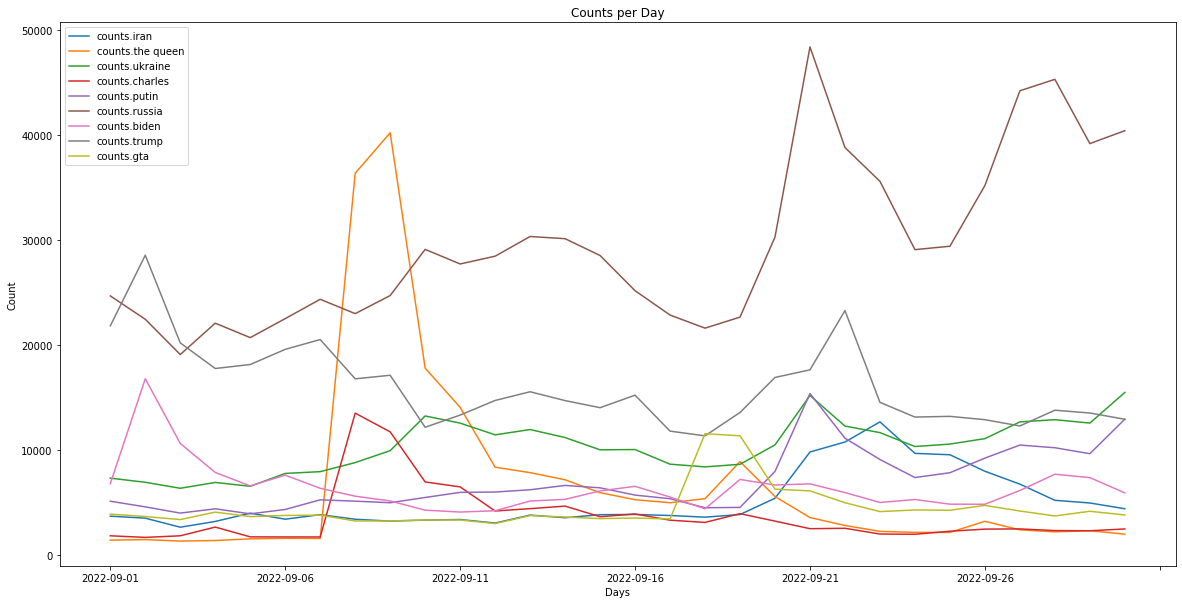

In [76]:

diff_df = df.max() - df.min()
print(diff_df)

filtered_diff_df = diff_df.loc[diff_df > 7000]

print(filtered_diff_df)

df_mostdiff = df[filtered_diff_df.index]
print(df_mostdiff)

#df_mostdiff.plot(kind='bar', stacked=True, figsize=(20,10))
df_mostdiff.plot(kind='line', figsize=(20,10))
#plt.show()
plt.xlabel('Days')
plt.ylabel('Count')
plt.title('Counts per Day')
plt.savefig('highestpercentage_change_new.jpg')

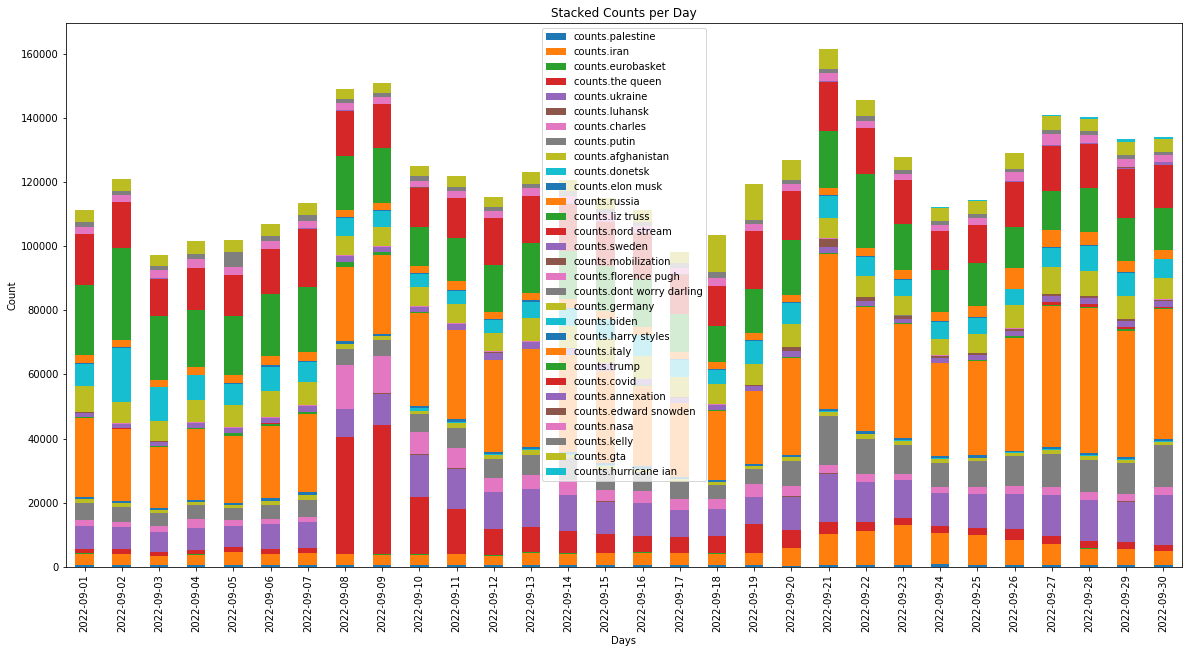

In [77]:
import pandas as pd

#df =  pd.json_normalize(results)
#df_new = pd.DataFrame(df)
#print(df)
#df = df.set_index('day')
df = df.fillna(0)
df.plot(kind='bar', stacked=True, figsize=(20,10))
#plt.show()
#df.to_csv('analysis_new_final.csv')

plt.xlabel('Days')
plt.ylabel('Count')
plt.title('Stacked Counts per Day')
plt.savefig('all_words_final.jpg')